In [2]:
# Libraries Required ; E = Expecation
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo # pip install ucimlrepo
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

> Dataset Import Completed
************************************************************


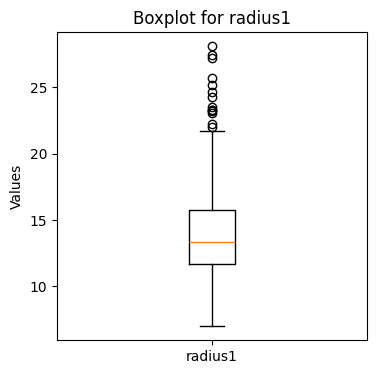


1. Summary Stats for radius1
Q1     : 11.7
Median : 13.37
Q3     : 15.78
Min    : 6.981
Max    : 28.11
************************************************************


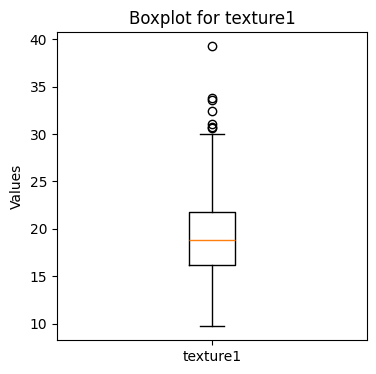


2. Summary Stats for texture1
Q1     : 16.17
Median : 18.84
Q3     : 21.8
Min    : 9.71
Max    : 39.28
************************************************************


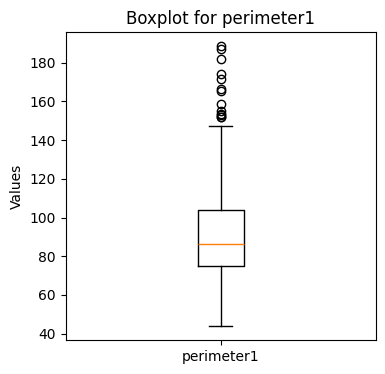


3. Summary Stats for perimeter1
Q1     : 75.17
Median : 86.24
Q3     : 104.1
Min    : 43.79
Max    : 188.5
************************************************************


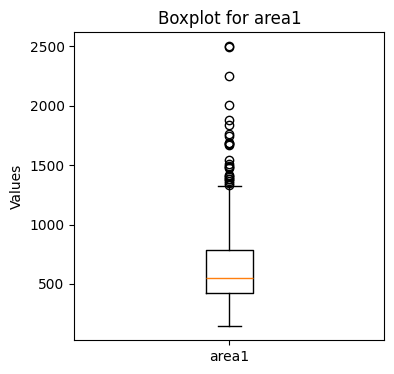


4. Summary Stats for area1
Q1     : 420.3
Median : 551.1
Q3     : 782.7
Min    : 143.5
Max    : 2501.0
************************************************************


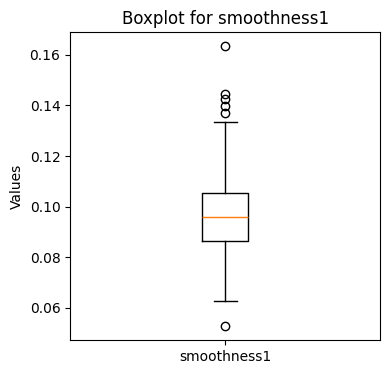


5. Summary Stats for smoothness1
Q1     : 0.08637
Median : 0.09587
Q3     : 0.1053
Min    : 0.05263
Max    : 0.1634
************************************************************


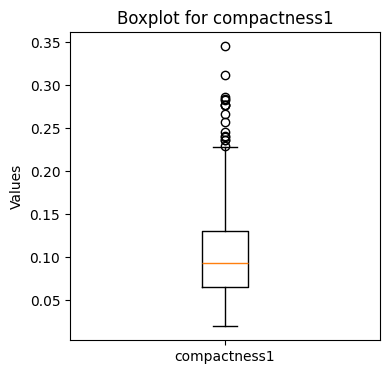


6. Summary Stats for compactness1
Q1     : 0.06492
Median : 0.09263
Q3     : 0.1304
Min    : 0.01938
Max    : 0.3454
************************************************************


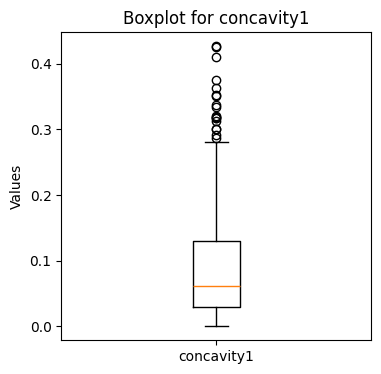


7. Summary Stats for concavity1
Q1     : 0.02956
Median : 0.06154
Q3     : 0.1307
Min    : 0.0
Max    : 0.4268
************************************************************


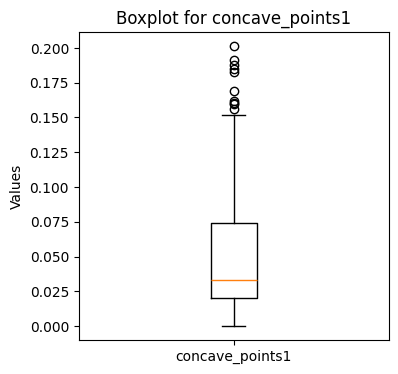


8. Summary Stats for concave_points1
Q1     : 0.02031
Median : 0.0335
Q3     : 0.074
Min    : 0.0
Max    : 0.2012
************************************************************


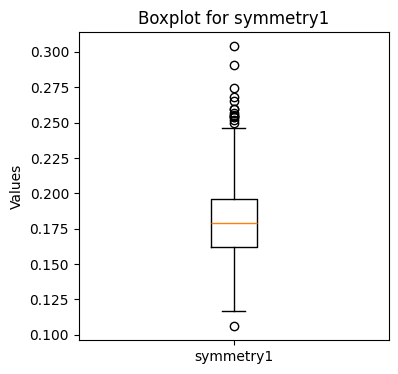


9. Summary Stats for symmetry1
Q1     : 0.1619
Median : 0.1792
Q3     : 0.1957
Min    : 0.106
Max    : 0.304
************************************************************


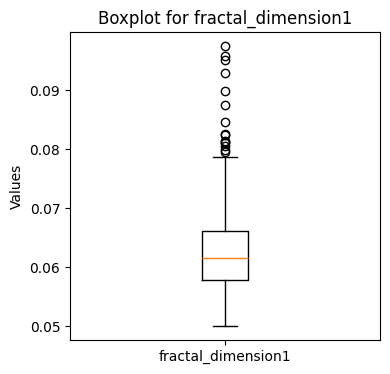


10. Summary Stats for fractal_dimension1
Q1     : 0.0577
Median : 0.06154
Q3     : 0.06612
Min    : 0.04996
Max    : 0.09744
************************************************************


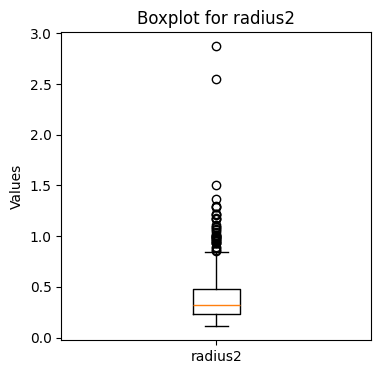


11. Summary Stats for radius2
Q1     : 0.2324
Median : 0.3242
Q3     : 0.4789
Min    : 0.1115
Max    : 2.873
************************************************************


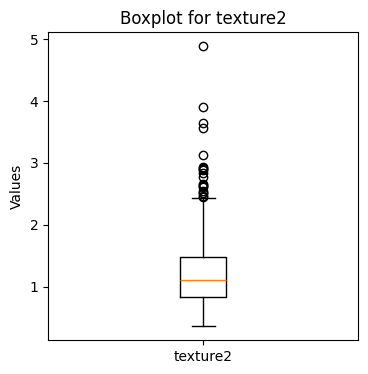


12. Summary Stats for texture2
Q1     : 0.8339
Median : 1.108
Q3     : 1.474
Min    : 0.3602
Max    : 4.885
************************************************************


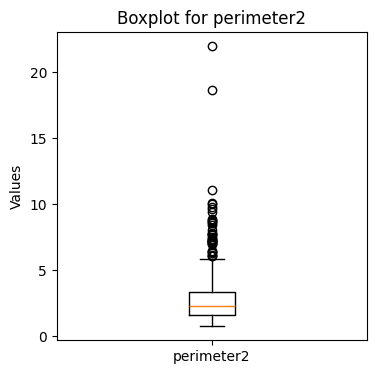


13. Summary Stats for perimeter2
Q1     : 1.606
Median : 2.287
Q3     : 3.357
Min    : 0.757
Max    : 21.98
************************************************************


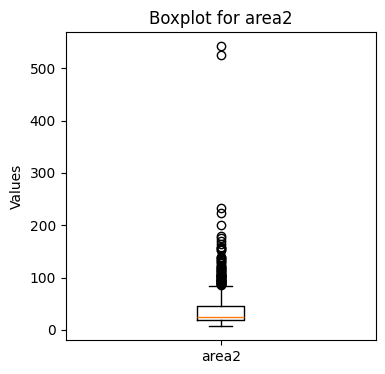


14. Summary Stats for area2
Q1     : 17.85
Median : 24.53
Q3     : 45.19
Min    : 6.802
Max    : 542.2
************************************************************


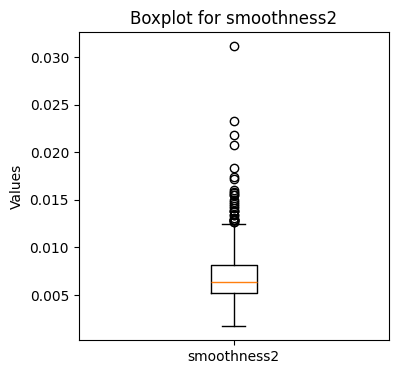


15. Summary Stats for smoothness2
Q1     : 0.005169
Median : 0.00638
Q3     : 0.008146
Min    : 0.001713
Max    : 0.03113
************************************************************


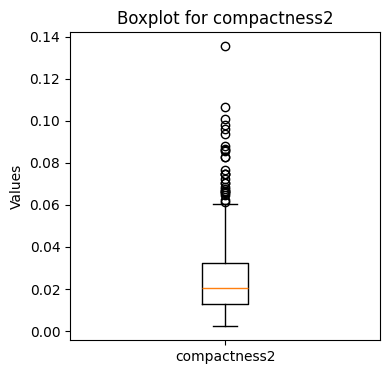


16. Summary Stats for compactness2
Q1     : 0.01308
Median : 0.02045
Q3     : 0.03245
Min    : 0.002252
Max    : 0.1354
************************************************************


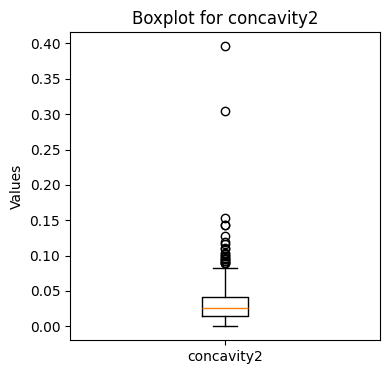


17. Summary Stats for concavity2
Q1     : 0.01509
Median : 0.02589
Q3     : 0.04205
Min    : 0.0
Max    : 0.396
************************************************************


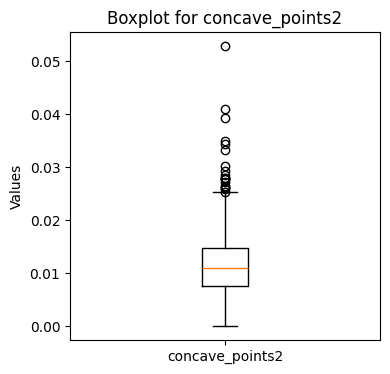


18. Summary Stats for concave_points2
Q1     : 0.007638
Median : 0.01093
Q3     : 0.01471
Min    : 0.0
Max    : 0.05279
************************************************************


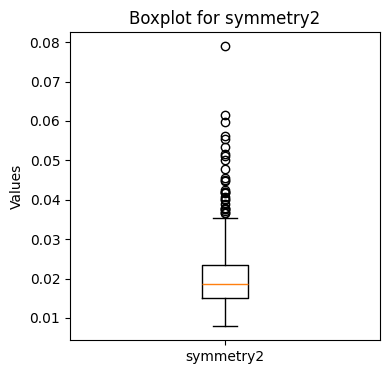


19. Summary Stats for symmetry2
Q1     : 0.01516
Median : 0.01873
Q3     : 0.02348
Min    : 0.007882
Max    : 0.07895
************************************************************


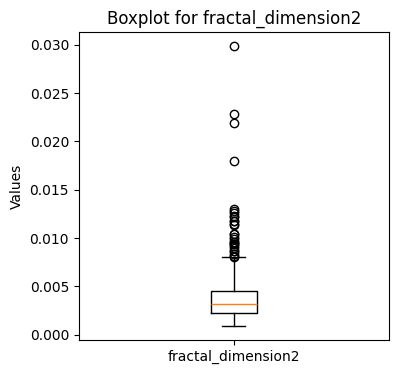


20. Summary Stats for fractal_dimension2
Q1     : 0.002248
Median : 0.003187
Q3     : 0.004558
Min    : 0.0008948
Max    : 0.02984
************************************************************


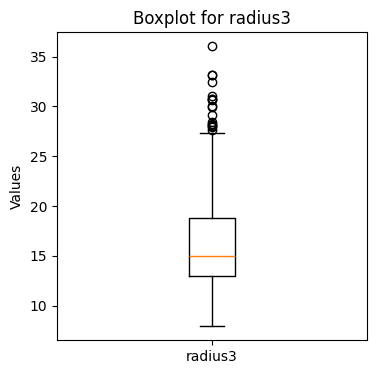


21. Summary Stats for radius3
Q1     : 13.01
Median : 14.97
Q3     : 18.79
Min    : 7.93
Max    : 36.04
************************************************************


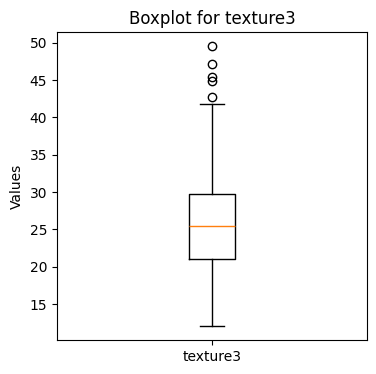


22. Summary Stats for texture3
Q1     : 21.08
Median : 25.41
Q3     : 29.72
Min    : 12.02
Max    : 49.54
************************************************************


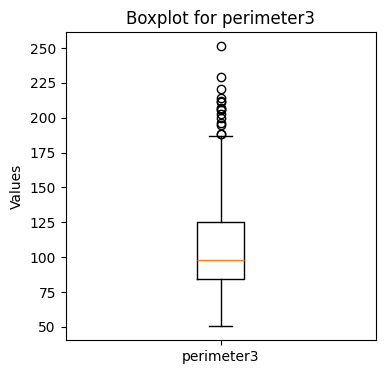


23. Summary Stats for perimeter3
Q1     : 84.11
Median : 97.66
Q3     : 125.4
Min    : 50.41
Max    : 251.2
************************************************************


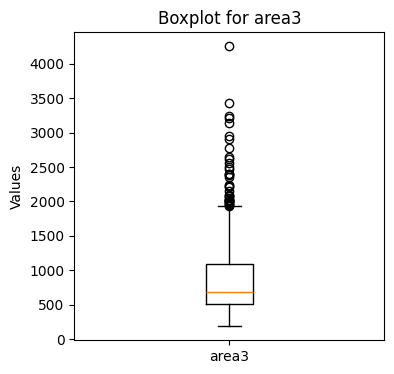


24. Summary Stats for area3
Q1     : 515.3
Median : 686.5
Q3     : 1084.0
Min    : 185.2
Max    : 4254.0
************************************************************


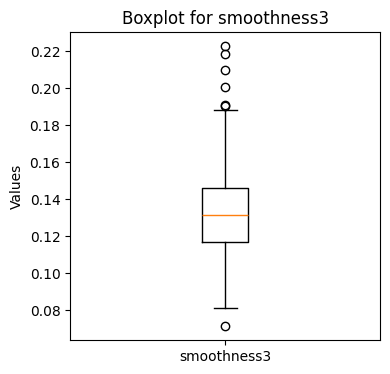


25. Summary Stats for smoothness3
Q1     : 0.1166
Median : 0.1313
Q3     : 0.146
Min    : 0.07117
Max    : 0.2226
************************************************************


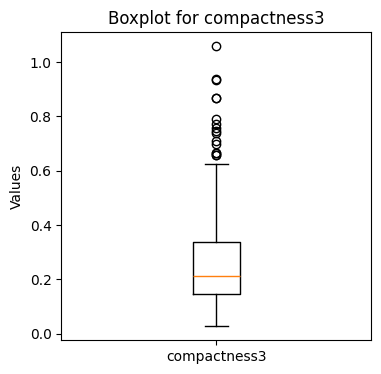


26. Summary Stats for compactness3
Q1     : 0.1472
Median : 0.2119
Q3     : 0.3391
Min    : 0.02729
Max    : 1.058
************************************************************


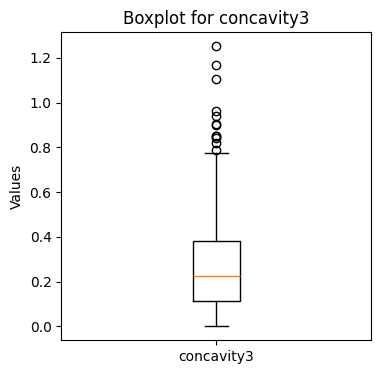


27. Summary Stats for concavity3
Q1     : 0.1145
Median : 0.2267
Q3     : 0.3829
Min    : 0.0
Max    : 1.252
************************************************************


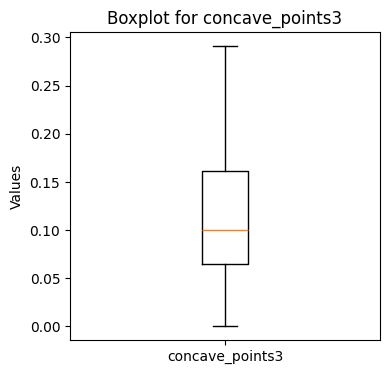


28. Summary Stats for concave_points3
Q1     : 0.06493
Median : 0.09993
Q3     : 0.1614
Min    : 0.0
Max    : 0.291
************************************************************


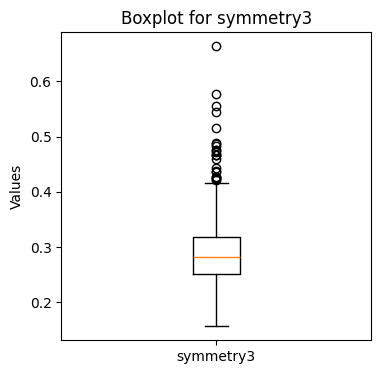


29. Summary Stats for symmetry3
Q1     : 0.2504
Median : 0.2822
Q3     : 0.3179
Min    : 0.1565
Max    : 0.6638
************************************************************


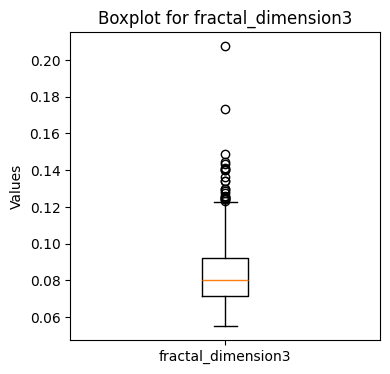


30. Summary Stats for fractal_dimension3
Q1     : 0.07146
Median : 0.08004
Q3     : 0.09208
Min    : 0.05504
Max    : 0.2075
************************************************************
> Box Plots Creation Completed


In [3]:
def data_ingestion(repo_id):
    # fetch dataset
    breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=repo_id)

    # data (as pandas dataframes)
    X = breast_cancer_wisconsin_diagnostic.data.features
    y = breast_cancer_wisconsin_diagnostic.data.targets

    # E1 - Removing ID Attribute
    X = X.drop(columns=[col for col in X.columns if "id" in col.lower()])
    print("> Dataset Import Completed")

    return X,y

def create_bp(X,y) :
    # E2 - Basic Statistics for the 30 Attributes

    # Side-by-side boxplots were not used to avoid the attribute with a significantly
    # higher value range from compressing the smaller ranges of the other attributes

    n = 1
    print("*" * 60)

    for col in X:
      # Plotting boxplot for each column
      plt.figure(figsize=(4,4))
      plt.boxplot(X[col], vert=True)
      plt.xticks([1],[col])
      plt.title(f"Boxplot for {col}")
      plt.ylabel("Values")
      plt.show()

      # Print summary statistics
      series = X[col]
      median = series.median()
      q1 = series.quantile(0.25)
      q3 = series.quantile(0.75)
      min_val = series.min()
      max_val = series.max()

      print(f"\n{n}. Summary Stats for {col}")
      print(f"Q1     : {q1}")
      print(f"Median : {median}")
      print(f"Q3     : {q3}")
      print(f"Min    : {min_val}")
      print(f"Max    : {max_val}")
      print("*" * 60)
      n += 1

X,y = data_ingestion(17)
create_bp(X,y)
print("> Box Plots Creation Completed")

In [4]:
def data_cleaning(X,y):

    # E3 - Check Missing Values

    count_missing = X.isnull().sum()
    print("> Missing values count per column:\n")
    print(count_missing)
    print()

    # E4 - Filling missing values using Mean Imputation (if needed)

    col_with_mv = count_missing[count_missing > 0].index.tolist()
    for col in col_with_mv:

      # label = class for the current group (Benign or Malignant)
      # group = DataFrame containing rows from X that belongs to the above label

      for label, group in X.groupby(y):
        # Computing the mean of the column for this class
        mean_val = group[col].mean()
        # Filling missing values in X[col] for this specific class
        X.loc[y == label, col] = X.loc[y == label, col].fillna(mean_val)

    print("> Data Imputation Completed")

    # E5 - Min-Max Recaling of Attributes

    scaler = MinMaxScaler()             # .fit_transform() calculates min,max and applies the scaling formula
    X_scaled = scaler.fit_transform(X)  # this returns a NumPy Array
    # Converting back to df
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

    print("> Min-Max Scaling Completed")

    # E6 - Transforming Class labels to 0 & 1

    col_name = y.columns[0]
    y = pd.DataFrame(y[col_name].map({"B": 0, "M": 1}))

    print("> Class Labels Transformation Completed")

    return X_scaled, y

X_scaled, y = data_cleaning(X,y)

> Missing values count per column:

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

> Data Imputation Completed
> Min-Max Scaling Completed
> Class Labels Transformation Completed


In [5]:
def set_creation_and_verification(X_scaled,y,test_size_num,random_seed):

    # E7 - Creating Single Training and Test Set

    # test_size = 0.2 implies 20% used for testing, 80% used for training
    # stratify  = replicate distribution of labels of orginial (y) in y_train and y_test
    # random    = allows us to reproduce experiment results by fixing randomness

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size_num, stratify=y, random_state=random_seed)

    print("> Training and Test Set Creation Completed\n")

    # E8 - Verify Data Shape & Stratification of y

    print("Shape of X_train",X_train.shape)
    print("Shape of y_train",y_train.shape)
    print("Shape of X_test ",X_test.shape)
    print("Shape of X_train",y_test.shape)

    if (X_train.shape[0] == y_train.shape[0]) and (X_test.shape[0] == y_test.shape[0]):
      print("\n> Dataset Shape Verification Completed")

    print("> Training and Test Set Distribution Verification")
    print("\nTrain set class distribution:")
    print(y_train.value_counts(normalize=True))
    print("\nTest set class distribution:")
    print(y_test.value_counts(normalize=True))

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = set_creation_and_verification(X_scaled,y,0.2,40)

> Training and Test Set Creation Completed

Shape of X_train (455, 30)
Shape of y_train (455, 1)
Shape of X_test  (114, 30)
Shape of X_train (114, 1)

> Dataset Shape Verification Completed
> Training and Test Set Distribution Verification

Train set class distribution:
Diagnosis
0            0.626374
1            0.373626
Name: proportion, dtype: float64

Test set class distribution:
Diagnosis
0            0.631579
1            0.368421
Name: proportion, dtype: float64


In [6]:
def training_and_testing_kNN_classifiers(X_train, X_test, y_train, y_test,max_k_val):

  # E9  - Training and Testing using Single Dataset for each value of k
  # E10 - Compute Performance for each model

  y_train = y_train.to_numpy().flatten()
  y_test  = y_test.to_numpy().flatten()

  k_values = range(1,max_k_val+1)
  performance_summary = []
  print()

  for k in k_values:

    print(f"*** For k = {k} ***")
    print(f"> Start training of k-NN model")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f"> Test k-NN model")
    y_prediction = knn.predict(X_test)

    score     = f1_score(y_test, y_prediction)
    accuracy  = accuracy_score(y_test, y_prediction)
    precision = precision_score(y_test, y_prediction)
    d = {"k":k, "f1":score, "accuracy":accuracy, "precision":precision}
    performance_summary.append(d)

    print(f"> Performance Summary Updated\n")

  print("> Training and Testing Models Completed")
  return performance_summary

performance_summary = training_and_testing_kNN_classifiers(X_train, X_test, y_train, y_test,10)
print("> Show Performance Summary for Single Training and Test Set split:\n")
# Performance Summary for Single Training and Testing Set
print(json.dumps(performance_summary, indent=4))


*** For k = 1 ***
> Start training of k-NN model
> Test k-NN model
> Performance Summary Updated

*** For k = 2 ***
> Start training of k-NN model
> Test k-NN model
> Performance Summary Updated

*** For k = 3 ***
> Start training of k-NN model
> Test k-NN model
> Performance Summary Updated

*** For k = 4 ***
> Start training of k-NN model
> Test k-NN model
> Performance Summary Updated

*** For k = 5 ***
> Start training of k-NN model
> Test k-NN model
> Performance Summary Updated

*** For k = 6 ***
> Start training of k-NN model
> Test k-NN model
> Performance Summary Updated

*** For k = 7 ***
> Start training of k-NN model
> Test k-NN model
> Performance Summary Updated

*** For k = 8 ***
> Start training of k-NN model
> Test k-NN model
> Performance Summary Updated

*** For k = 9 ***
> Start training of k-NN model
> Test k-NN model
> Performance Summary Updated

*** For k = 10 ***
> Start training of k-NN model
> Test k-NN model
> Performance Summary Updated

> Training and Tes

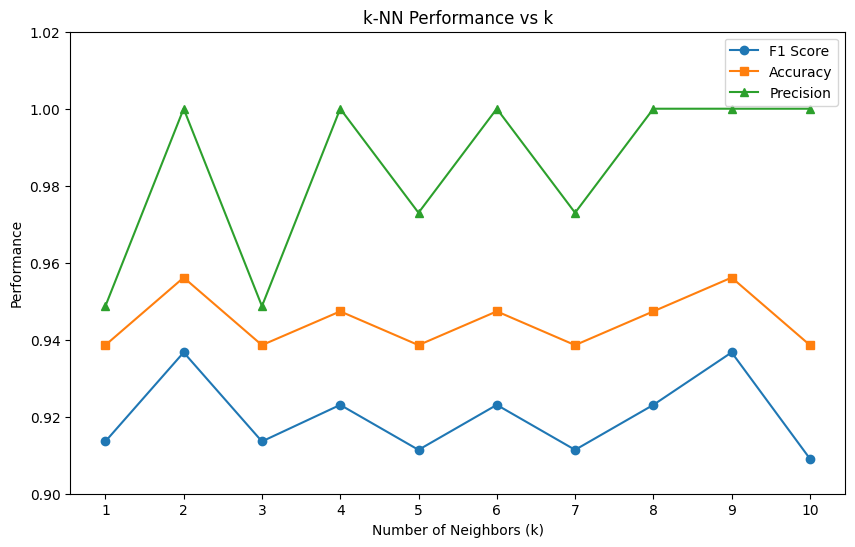


> Best k-NN model based on the given metric (Single Training and Test Set)
{'f1': 2, 'accuracy': 2, 'precision': 2}


In [7]:
# E11 - Visualizing Performance Summary - Single Training and Test Set

# Extract values from your summary
k_values         = [entry['k'] for entry in performance_summary]
f1_scores        = [entry['f1'] for entry in performance_summary]
accuracy_scores  = [entry['accuracy'] for entry in performance_summary]
precision_scores = [entry['precision'] for entry in performance_summary]

# Create figure
plt.figure(figsize=(10,6))

# Plot each metric
plt.plot(k_values, f1_scores, marker='o', label='F1 Score')
plt.plot(k_values, accuracy_scores, marker='s', label='Accuracy')
plt.plot(k_values, precision_scores, marker='^', label='Precision')

# Labels and title
plt.xticks(k_values)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Performance")
plt.title("k-NN Performance vs k")
plt.ylim(0.9, 1.02)  # Focus on the high-performance region
plt.legend()
plt.show()

print()

best_k = {}

for metric in ["f1", "accuracy", "precision"]:
    best_value = -float('inf')  # start lower than any possible value
    best_k_value = None
    for entry in performance_summary:
        if entry[metric] > best_value:
            best_value = entry[metric]
            best_k_value = entry["k"]
    best_k[metric] = best_k_value

print("> Best k-NN model based on the given metric (Single Training and Test Set)")
print(best_k)

**Note:**  

- F1-score: Harmonic mean of precision and recall, providing a single score that balances both the metrics
- Precision: Proportion of relevant positive preditions out of all positive predictions
- Accuracy: Total number of correct predicitions divided by the total number of predictions

So far, we have implemented k-NN models and evaluated their performance for `k = 1` to `10` using F1 score, precision, and accuracy, based on a single train-test split.  

Next, we will use **K-Fold Cross-Validation**, which provides a more reliable performance estimate by using multiple train-test splits. The process is:  

1. Split the dataset into `K` equal folds.  
2. For each fold:  
   - Use it as the test set.  
   - Use the remaining `K-1` folds as the training set.  
3. Train and test the model `K` times (once per fold).  
4. Average the metrics (F1, accuracy, precision) across all folds.  

This ensures that every data point is tested once and reduces variability in performance estimates compared to a single train-test split.


*** For k = 1 ***
> Performance Summary Updated

*** For k = 2 ***
> Performance Summary Updated

*** For k = 3 ***
> Performance Summary Updated

*** For k = 4 ***
> Performance Summary Updated

*** For k = 5 ***
> Performance Summary Updated

*** For k = 6 ***
> Performance Summary Updated

*** For k = 7 ***
> Performance Summary Updated

*** For k = 8 ***
> Performance Summary Updated

*** For k = 9 ***
> Performance Summary Updated

*** For k = 10 ***
> Performance Summary Updated

> k-Fold Training and Testing Completed

> Cross-validation Results:

    f1_mean  accuracy_mean  precision_mean
0  0.929668       0.947244        0.927004
1  0.939722       0.957802        1.000000
2  0.954605       0.966620        0.971196
3  0.953679       0.966605        0.985116
4  0.956829       0.968359        0.971418
5  0.963713       0.973622        0.985714
6  0.964062       0.973638        0.981174
7  0.966019       0.975392        0.995238
8  0.963946       0.973638        0.985936
9  0.961

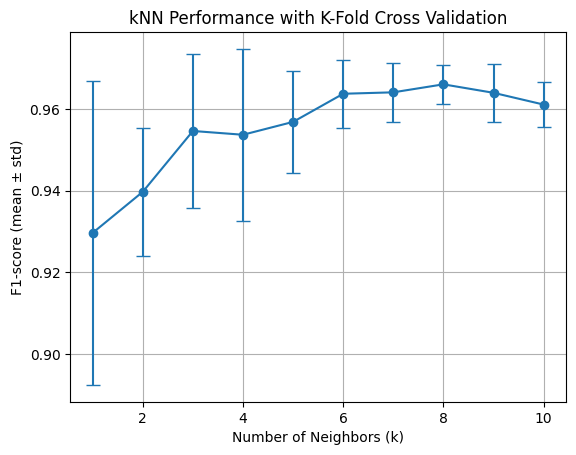

In [8]:
# E12 - K-Fold Cross Validation for kNNs

def kfold_training_and_testing_kNN(X, y, max_k_val, num_folds, random_seed):

    # StratifiedKFold ensures that the proportion of classes (B/M) is the same in each
    # fold as in the whole dataset
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=random_seed)
    performance_summary = []

    for k in range(1, max_k_val+1):

        f1_scores, accuracies, precisions = [], [], []
        print(f"\n*** For k = {k} ***")

        # For each fold, it gives the row indices for training and testing
        for train_index, test_index in skf.split(X, y):

            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Train k-NN
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train.values.ravel())

            # Predictions
            y_pred = knn.predict(X_test)

            # Store metrics
            f1_scores.append(f1_score(y_test, y_pred))
            accuracies.append(accuracy_score(y_test, y_pred))
            precisions.append(precision_score(y_test, y_pred))

        # Save results for this k
        d = {
            "k": k,
            "f1_mean": np.mean(f1_scores),
            "f1_std": np.std(f1_scores),
            "accuracy_mean": np.mean(accuracies),
            "accuracy_std": np.std(accuracies),
            "precision_mean": np.mean(precisions),
            "precision_std": np.std(precisions),
        }

        performance_summary.append(d)
        print(f"> Performance Summary Updated")

    print("\n> k-Fold Training and Testing Completed")
    return performance_summary

performance_summary_kfold = kfold_training_and_testing_kNN(X_scaled, y, max_k_val=10, num_folds=5, random_seed=40)

# Convert to DataFrame
results = pd.DataFrame(performance_summary_kfold)

# Display results
print("\n> Cross-validation Results:\n")
print(results[["f1_mean","accuracy_mean","precision_mean"]])

# Best Model based on F1-score
best_model = results.loc[results['f1_mean'].idxmax()]   # idxmax() finds the row index with highest mean F1-score
print("\n> Best model based on F1-score:\n")
print(best_model)
print()

plt.errorbar(results["k"], results["f1_mean"],yerr=results["f1_std"],fmt='-o', capsize=5)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("F1-score (mean ± std)")
plt.title("kNN Performance with K-Fold Cross Validation")
plt.grid(True)
plt.show()

**Conclusion**

After testing with k = 5 folds, the best model concluded by the pipeline is k-NN with k = 8.

- k:                 8.000000
- f1_mean:           0.966019
- f1_std:            0.004839
- accuracy_mean:     0.975392
- accuracy_std:      0.003533
- precision_mean:    0.995238
- precision_std:     0.009524

After testing with k = 10 folds, the best model concluded by the pipeline is k-NN with k = 9.

- k:                 9.000000
- f1_mean:           0.965944
- f1_std:            0.021959
- accuracy_mean:     0.975407
- accuracy_std:      0.016066
- precision_mean:    0.990476
- precision_std:     0.019048

Looking at the above statistics, which are very close in terms of value,
I would choose to go with k = 5 folds, with k-NN with k = 8 due to its higher score and lower standard deviation. The model is reliable and robust compared to other models, though human interpretation of model evaluation is a must due to the sensitive nature of the model's use.